<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/NWI_and_NLCD_combine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import geopandas as gpd
!pip install rasterio

import rasterio
from rasterio.features import rasterize
from rasterio.plot import show
import matplotlib.pyplot as plt
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from googleapiclient.http import MediaFileUpload, MediaIoBaseDownload



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 32.9 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Download the shapefile and raster
shapefile_id = '/content/drive/MyDrive/data/wetland_project/raw_data/nwi_shapefiles/haleiwa.shp' # Replace with your shapefile ID
raster_id = '/content/drive/MyDrive/data/wetland_project/raw_data/nlcd_raster/nlcd_haleiwa.tif' # Replace with your raster file ID

In [ ]:
import numpy as np
import zipfile
import os
import shutil


In [9]:
import os
from osgeo import gdal

In [12]:
# check the projection
# Open the dataset
dataset = gdal.Open(raster_id)

# Check if the dataset was successfully opened
if not dataset:
    print("Unable to open file")
else:
    # Get projection information
    projection = dataset.GetProjection()
    print("Projection Info:\n", projection)

    # Close the dataset
    dataset = None

Projection Info:
 PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-159],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32604"]]


In [35]:
# Read and process the shapefile and raster
shapefile = gpd.read_file(shapefile_id)
with rasterio.open(raster_id) as src:
    rasterized = rasterize([(geom, value) for geom, value in zip(shapefile.geometry, shapefile['SHAPE_Area'])],
                           out_shape=src.shape, transform=src.transform)
    land_cover = src.read(1)
    combined = np.where(rasterized != 0, rasterized, land_cover)

    # Save the combined raster
    with rasterio.open('haleiwa_combined.tif', 'w', **src.meta) as dst:
        dst.write(combined, 1)

In [ ]:
shapefile['ACRES']

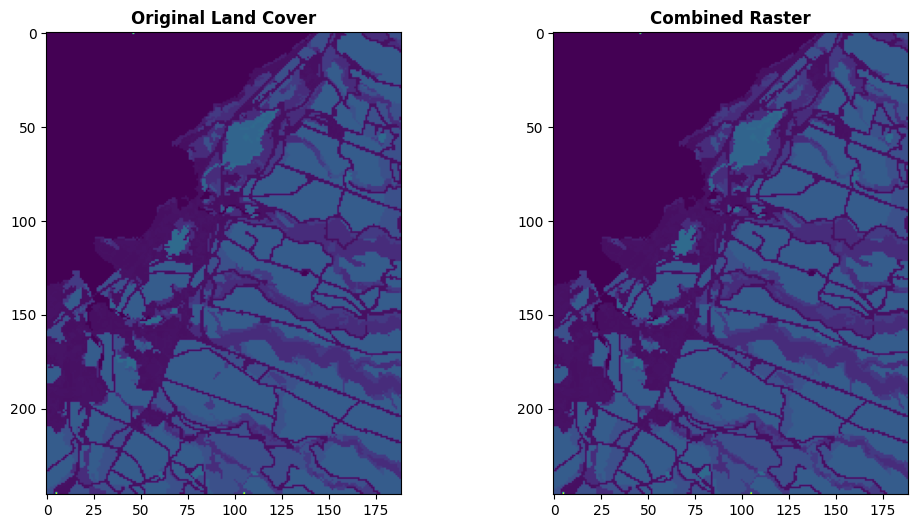

In [36]:
# Visualization for checking
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
show(land_cover, ax=ax[0], title='Original Land Cover')
show(combined, ax=ax[1], title='Combined Raster')
plt.show()